<a href="https://colab.research.google.com/github/Uma1709/intership/blob/main/image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Image Processing CV

In [1]:
# Importing Necessaary Libraries
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
img_path = "/content/road-gc4ff2c398_1280.jpg"
img = cv2.imread(img_path)
print(img.shape)


(748, 1280, 3)


#1.1 Converting Image to Grayscale

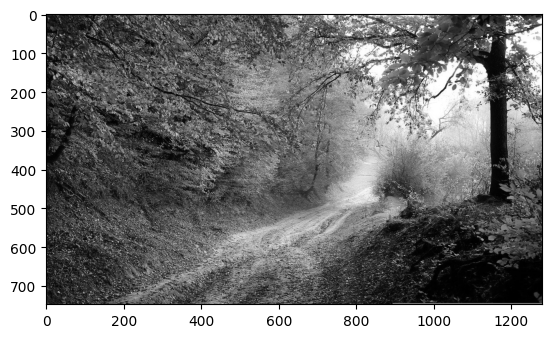

(748, 1280)


In [3]:

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.show()
print(gray_image.shape)

#Cropping Image

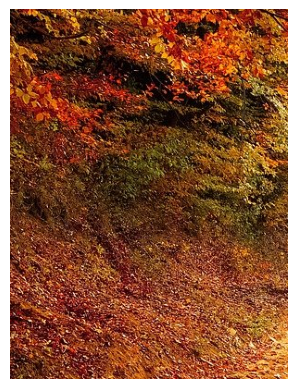

In [4]:
x = 150  # starting x coordinate of the ROI
y = 250  # starting y coordinate of the ROI
width = 300  # width of the ROI
height = 400  # height of the ROI
# Crop the image using the ROI coordinates
cropped_img = img[y:y+height, x:x+width]
# Display the cropped image using matplotlib
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()



# Thresholding the Image

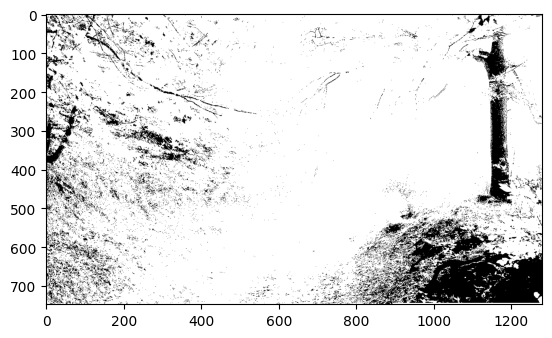

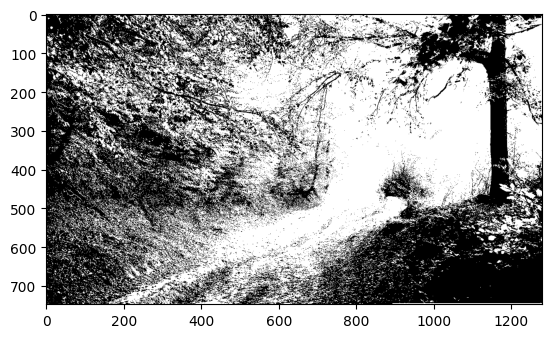

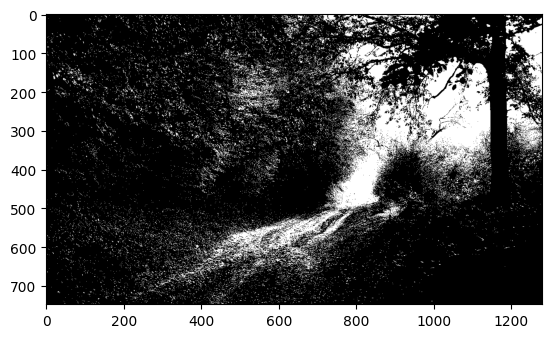

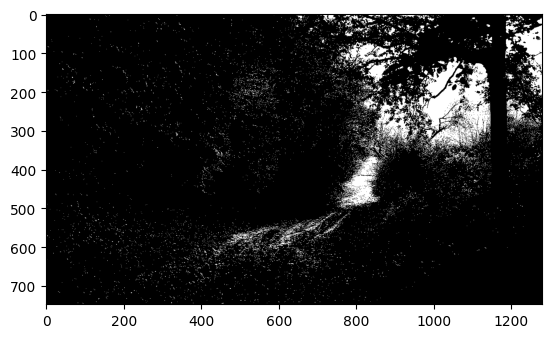

In [5]:
(thresh, blackAndWhiteImage) = cv2.threshold(gray_image, 20, 255, cv2.THRESH_BINARY)
'''Thresholding is performed with a threshold value of 20.
Pixels with intensity values less than 20 are set to 0 (black), and pixels with
intensity values greater than or equal to 20 are set to 255 (white). '''
plt.imshow(blackAndWhiteImage, cmap='gray')
plt.show()
(thresh, blackAndWhiteImage) = cv2.threshold(gray_image, 80, 255, cv2.THRESH_BINARY)
plt.imshow(blackAndWhiteImage, cmap='gray')
plt.show()
(thresh, blackAndWhiteImage) = cv2.threshold(gray_image, 160, 255, cv2.THRESH_BINARY)
plt.imshow(blackAndWhiteImage, cmap='gray')
plt.show()
(thresh, blackAndWhiteImage) = cv2.threshold(gray_image, 200, 255, cv2.THRESH_BINARY)
plt.imshow(blackAndWhiteImage, cmap='gray')
plt.show()


#Bluring the Image

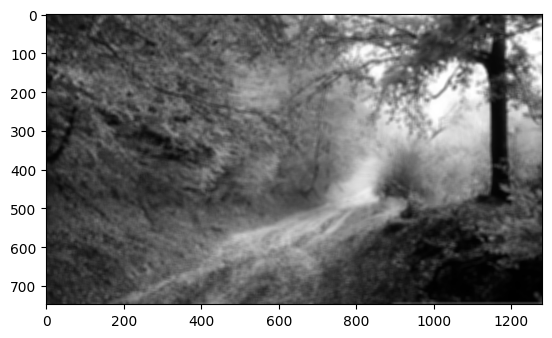

In [6]:

output2 = cv2.blur(gray_image, (10, 10)) #Using the inbuilt Bluring function
plt.imshow(output2, cmap='gray')
plt.show()

# Gaussian Blur

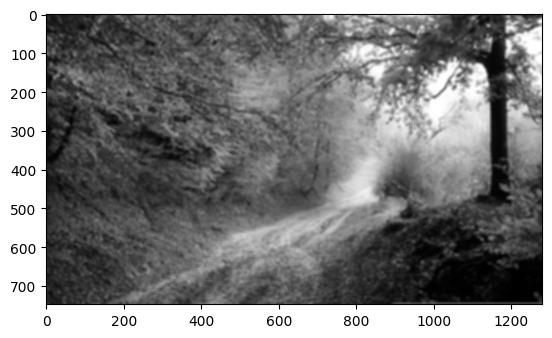

In [7]:

output2 = cv2.GaussianBlur(gray_image, (9, 9), 10)   #(9,9) -> represents the kernel size and 10 represents standard deviation
plt.imshow(output2, cmap='gray')
plt.show()


#Rotating and Scaling of the image

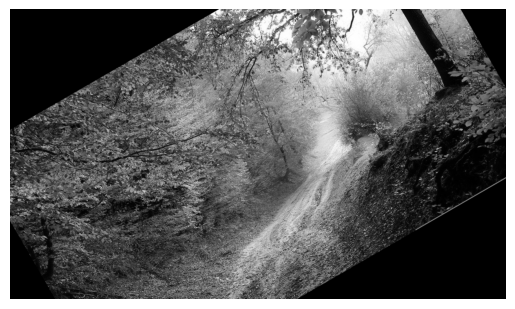

In [8]:
# Define the rotation angle and scale factor
angle = 30
scale = 1.0
# Get the image dimensions
(h, w) = img.shape[:2]
# Calculate the center point of the image
center = (w // 2, h // 2)
# Define the rotation matrix
M = cv2.getRotationMatrix2D(center, angle, scale)
# Apply the rotation to the image
rotated_img = cv2.warpAffine(gray_image, M, (w, h))
# Display the rotated image
plt.imshow(cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

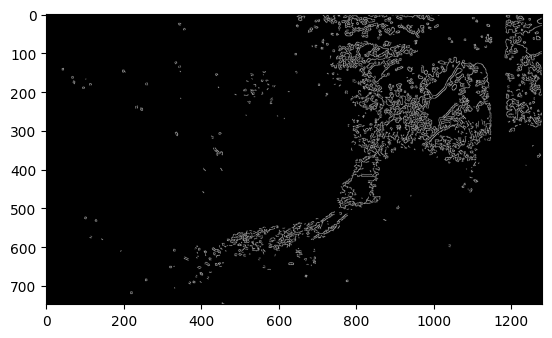

In [9]:
#Canny with Gaussian Blur

img = cv2.imread(img_path)
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
(thresh, output2) = cv2.threshold(gray_image, 200, 255, cv2.THRESH_BINARY)
output2 = cv2.GaussianBlur(output2, (5, 5), 3)
output2 = cv2.Canny(output2, 180, 255)
'''It applies the Canny edge detection algorithm, which identifies edges based on gradient intensity.
The specified thresholds of 180 and 255 determine the minimum and maximum
gradient values for an edge to be considered.'''
plt.imshow(output2,cmap='gray')
plt.show()

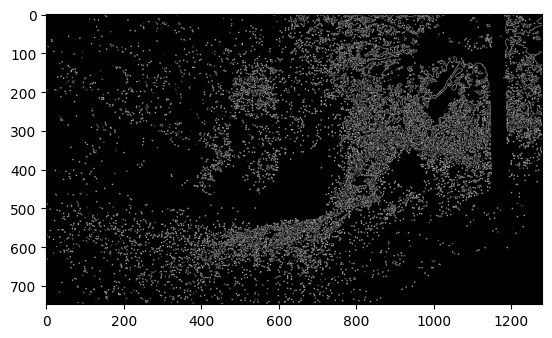

In [10]:
#b) Canny without Gaussian Blur

img = cv2.imread(img_path)
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
(thresh, output2) = cv2.threshold(gray_image, 200, 255, cv2.THRESH_BINARY)
output2 = cv2.Canny(output2, 180, 255)
plt.imshow(output2,cmap='gray')
plt.show()

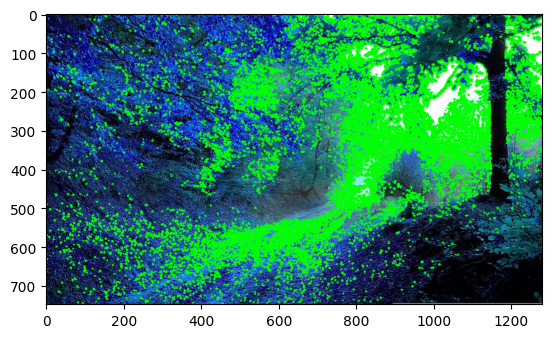

In [11]:
#Home work



lines = cv2.HoughLinesP(output2, 1, np.pi/180,30)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),4)
plt.imshow(img)